# Import libraries

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib  inline 
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


# Load dataset 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 35s 0us/step


# Display images


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = (x_train, y_train), (x_test, y_test)
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

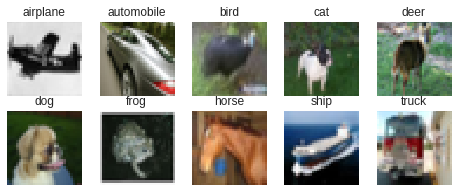

In [25]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (0, 1, 2))
    ax.set_title(class_names[i])
    plt.imshow(im)


In [26]:
im.shape

(32, 32, 3)

 # Data preprocessing

In [0]:
#convert to float and normalize
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Function to plot model accuracy and loss ; to compute test accuracy.

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

# CNN for CIFAR10 dataset

In [0]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
# Define the model
model = Sequential()
model.add(Conv2D(48, 3, 3, border_mode='same', input_shape=(3,32, 32)))
model.add(Activation('relu'))
model.add(Conv2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Conv2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
train_features=np.transpose(train_features, (0,3, 2, 1))

In [0]:
test_features=np.transpose(test_features, (0,3, 2, 1))

Epoch 1/200
50000/50000 [==============================] - 19s 372us/step - loss: 0.6166 - acc: 0.7903
Epoch 2/200
50000/50000 [==============================] - 19s 371us/step - loss: 0.5916 - acc: 0.7984
Epoch 3/200
50000/50000 [==============================] - 19s 372us/step - loss: 0.5783 - acc: 0.8034
Epoch 4/200
50000/50000 [==============================] - 19s 370us/step - loss: 0.5521 - acc: 0.8110
Epoch 5/200
50000/50000 [==============================] - 19s 371us/step - loss: 0.5433 - acc: 0.8137
Epoch 6/200
50000/50000 [==============================] - 19s 372us/step - loss: 0.5399 - acc: 0.8166
Epoch 7/200
50000/50000 [==============================] - 19s 372us/step - loss: 0.5179 - acc: 0.8225
Epoch 8/200
50000/50000 [==============================] - 19s 371us/step - loss: 0.5142 - acc: 0.8262
Epoch 9/200
50000/50000 [==============================] - 19s 371us/step - loss: 0.4958 - acc: 0.8294
Epoch 10/200
50000/50000 [==============================] - 19s 370us/ste

KeyError: ignored

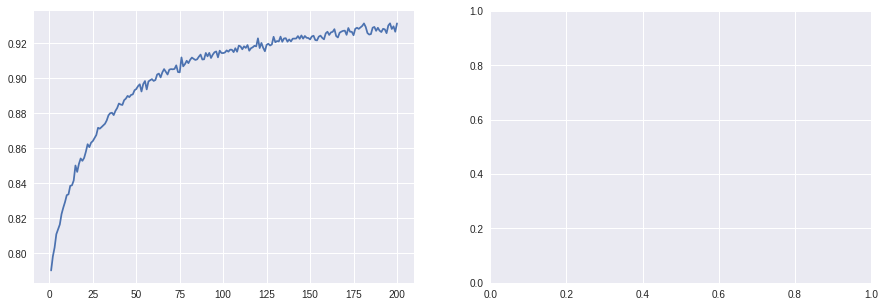

In [67]:
# Train the model



start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, epochs=200)
end = time.time()


# plot model history
plot_model_history(model_info)
print("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [69]:
score = model.evaluate(test_features, test_labels,batch_size=128)

10000/10000 [==============================] - 1s 118us/step


In [70]:
print('\nTest result: %.3f loss: %.3f' % (score[1]*100,score[0]))



Test result: 83.050 loss: 0.703
